In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Loading the dataset and setting the style
sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (12, 6)
df = pd.read_csv('../data/cleaned_walmart_sales.csv', parse_dates=['Date'])

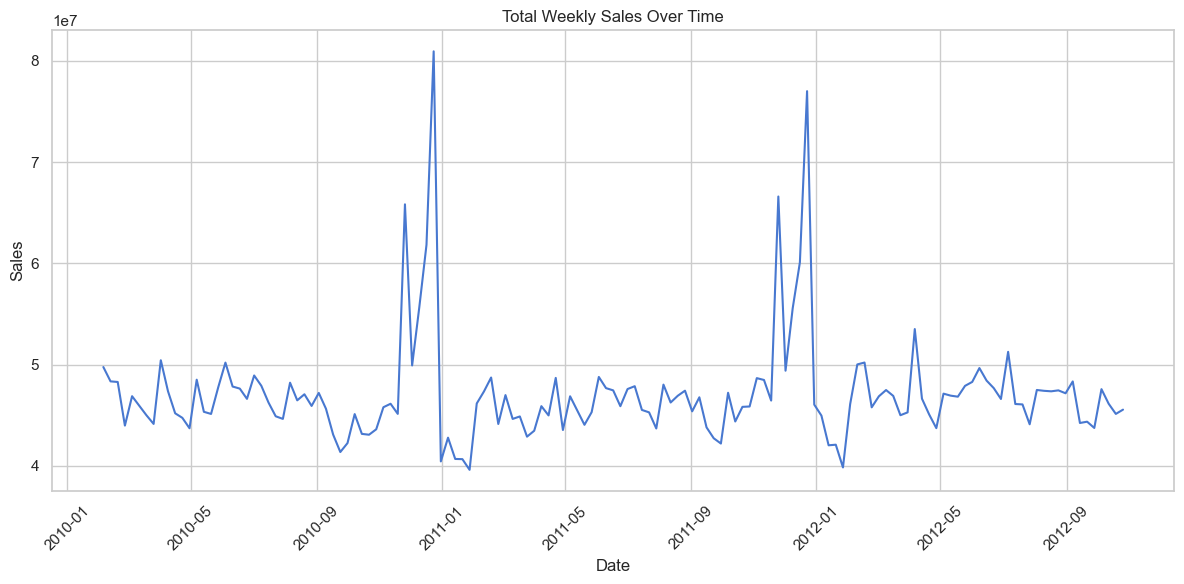

In [42]:
#Sales Seasonal trends with spikes in holidays like Thanksgiving and Christmas
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()
plt.plot(weekly_sales.index, weekly_sales.values)
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../reports/figures/weekly_sales_trend.png')
plt.show()

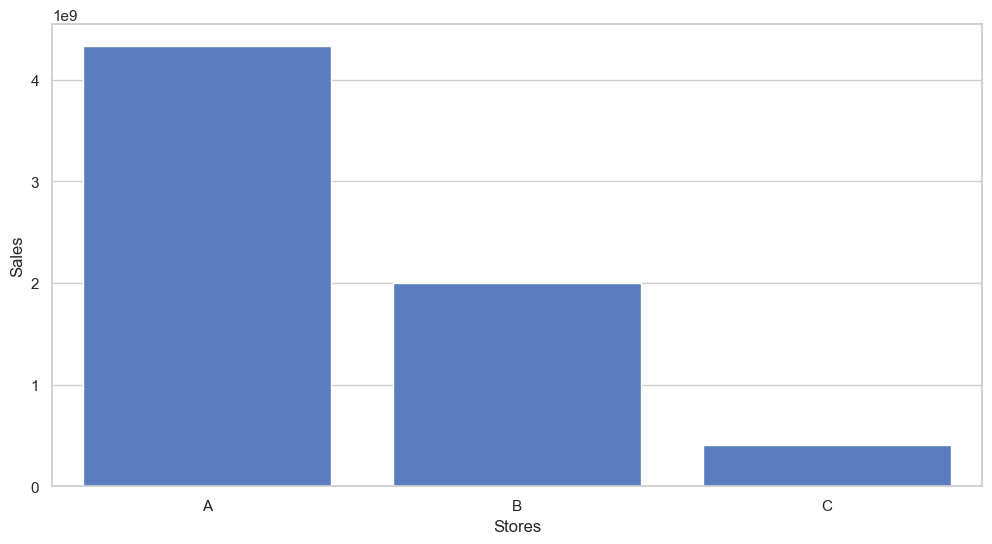

In [45]:
#Sales by Store Type
store_type_sales=df.groupby('Type')['Weekly_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=store_type_sales.index,y=store_type_sales.values)
plt.xlabel('Stores')
plt.ylabel('Sales')
plt.savefig('../reports/figures/holiday_vs_nonholiday_sales.png')
plt.show()

Store A has overall highest Sales.

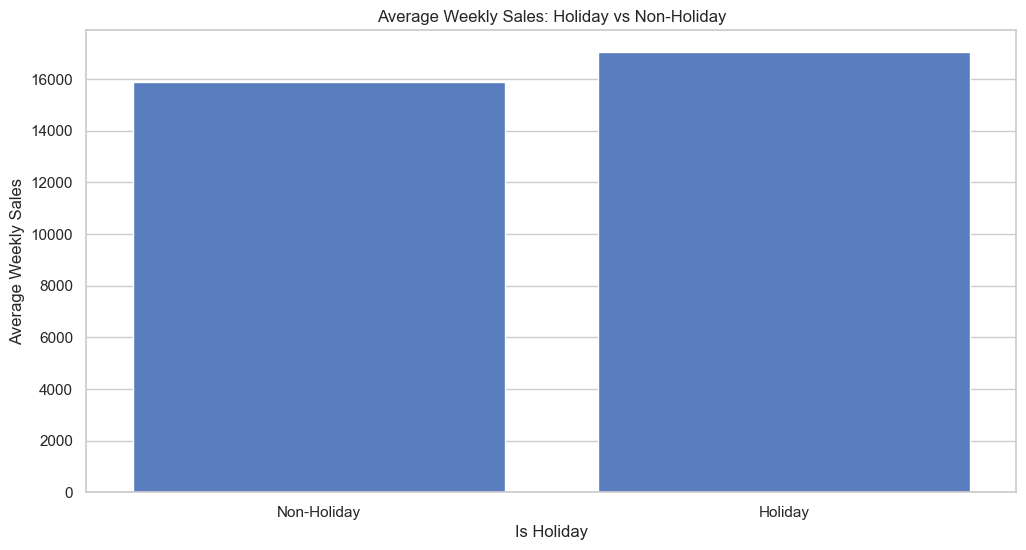

In [43]:
#Sales during Holidays
holiday_Sales=df.groupby('IsHoliday')['Weekly_Sales'].mean()
sns.barplot(x=holiday_Sales.index,y=holiday_Sales.values)
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Average Weekly Sales')
plt.xticks([0,1],['Non-Holiday','Holiday'])
plt.savefig('../reports/figures/sales_by_store_type.png')
plt.show()

Sales are higher during the holidays which confirms the impact of seasonal demand.


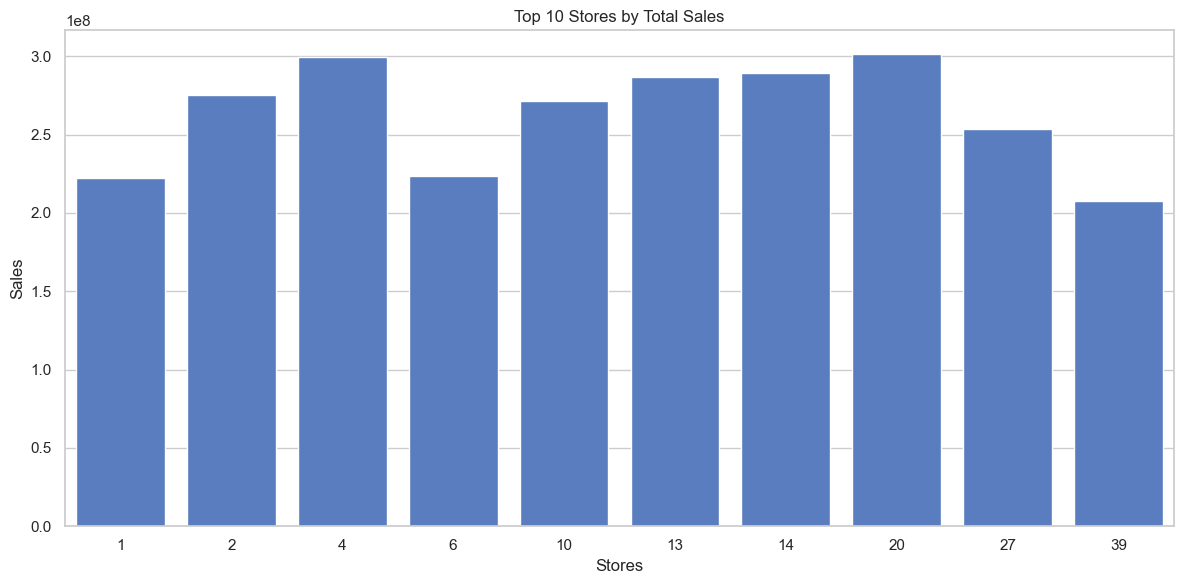

In [44]:
#Top performing Stores
top_stores=df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_stores.index,y=top_stores.values)
plt.xlabel('Stores')
plt.ylabel('Sales')
plt.title('Top 10 Stores by Total Sales')
plt.tight_layout()
plt.savefig('../reports/figures/top_stores_total_sales.png')
plt.show()

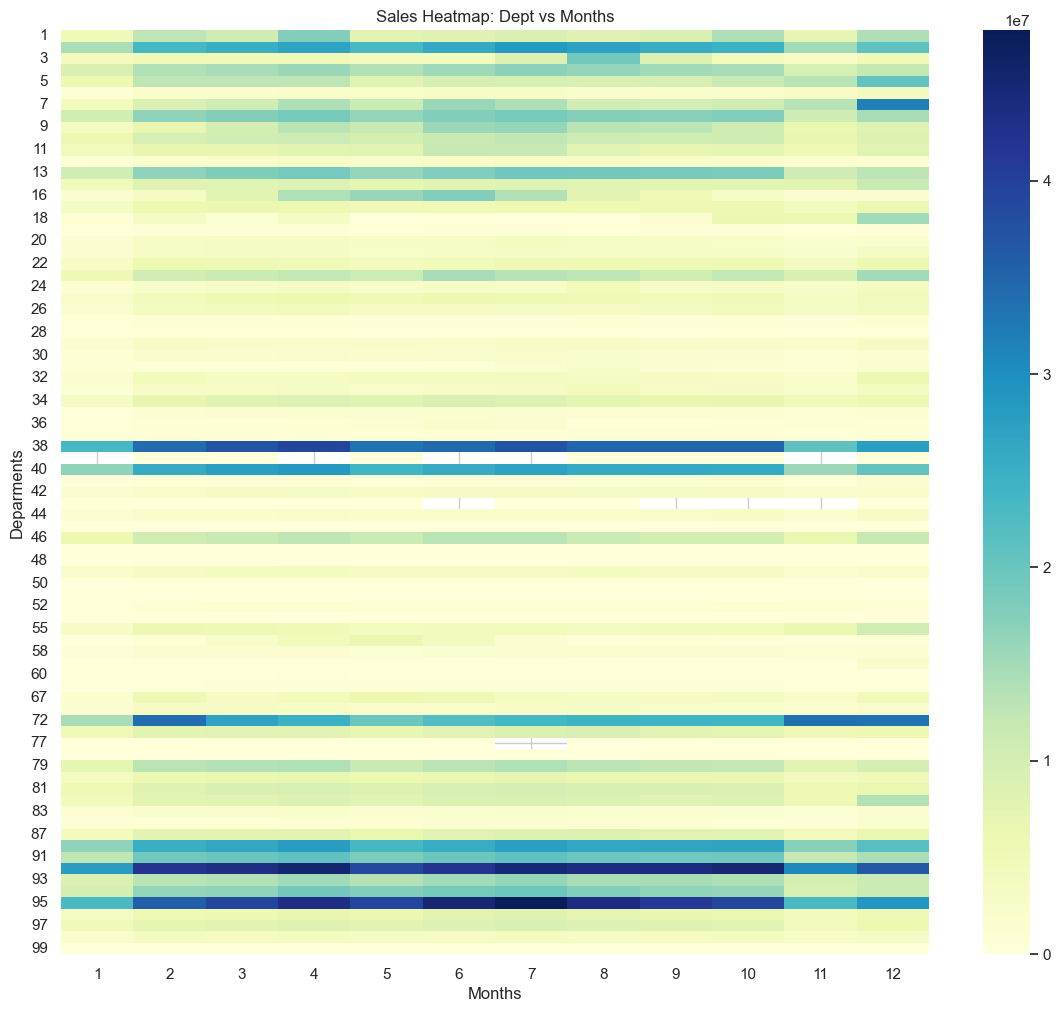

In [41]:
#Department Sales in each month
pivot=df.pivot_table(index='Dept',columns='Month',values='Weekly_Sales',aggfunc='sum')
plt.figure(figsize=(14, 12))
sns.heatmap(pivot, cmap='YlGnBu')
plt.xlabel('Months')
plt.ylabel('Deparments')
plt.title('Sales Heatmap: Dept vs Months')
plt.yticks(rotation=0)
plt.savefig('../reports/figures/department_sales_heatmap.png')
plt.show()


Some departments perform strongly in specific months, showing clear seasonality.